In [26]:
# 3/22 과제

## **데이터 전처리**
- 사이킷런의 ML 알고리즘을 적용하기 전 결손값 / 문자열 값을 다른 값으로 변환시키는 과정
- 결손값 : 입력값으로 허용되지 않으므로 업무 로직을 파악해 정밀한 대체 값을 선정해 변환
- 문자열 값 : 숫자형으로 변환하거나 주민번호 등 불필요한 피처의 경우 삭제 처리

### 데이터 인코딩
1. **레이블 인코딩 (Label encoding)** : 카테고리 피처 -> 코드형 숫자 값 ('01', '02' 도 문자열이므로 주의) * 레이블 인코딩의 경우 숫자의 대소가 예측 성능 저하를 발생시킬 수 있으므로 선형 회귀 등에는 적합하지 않음. 트리 계열의 알고리즘을 사용해야 함.
2. **원 핫 인코딩 (One hot encoding)** : 피처값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 칼럼에만 1, 나머지는 0을 표시하는 방식.
- 행 형태로 된 피처의 고유 값 -> 열 형태로 차원 변환 -> 고유 값 칼럼에 1 표시
- one hot encoder는 label encoder와 달리 변환 전 모든 문자열 값이 숫자형으로 변환되어야 함

### 피처 스케일링과 정규화
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- **StandardScaler** : 표준화 | SVM, 선형/로지스틱 회귀 등은 정규분포 가정하에 구현되므로 사전에 표준화하는 작업이 있어야 예측 성능이 향상됨.
- **MinMaxScalor** : 정규화, (개별 데이터의 크기 / 모든 피처 벡터의 크기) : 데이터가 가우시안 분포를 따르지 않을 경우

### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
- fit() : 데이터 변환 기준 정보 설정, transform() : fit으로 설정된 정보로 데이터 변환, fit_transform() : 한꺼번에
- 학습 데이터 세트로 fit, transform을 적용하면 테스트 데이터 세트는 학습 데이터 세트로 fit한 정보를 그대로 transform 변환을 적용해야 함. 테스트 데이터로 새로운 스케일링 정보 생성 시 학습 / 테스트의 기준 정보가 달라지므로 예측의 정확도가 떨어질 수 있음.
- fit_transform은 테스트 데이터에 절대 사용 x
- 전체 데이터 세트에 스케일링을 적용 후 학습 / 데이터 세트로 분리하는 것이 바람직함.

In [27]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

items = ['tv', '냉장고', '전자레인지', '컴퓨터',
         '선풍기', '믹서', '믹서']

# labelencoder를 객체로 생성한 후 fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 2 2]


In [28]:
# 많은 데이터의 경우 문자열이 어떤 숫자 값으로 인코딩됐는지 알기 어려움-> 원본값을 가지는 classes로 확인
# transform()으로 디코딩
print('인코딩 클래스:', encoder.classes_)
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

인코딩 클래스: ['tv' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'tv' '냉장고' '냉장고' '선풍기' '선풍기']


In [29]:
# 원 핫 인코딩
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['tv', '냉장고', '전자레인지', '컴퓨터',
         '선풍기', '믹서', '믹서']
# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환합니다.
labels = labels.reshape(-1, 1)

# 원 핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원 핫 인코딩 데이터')
print(oh_labels.toarray())
print('원 핫 인코딩 데이터 차원')
print(oh_labels.shape)

원 핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원 핫 인코딩 데이터 차원
(7, 6)


In [30]:
# pandas의 get_dummies로 원 핫 인코딩을 더 쉽게 할 수 있음 (숫자형 변환 없이)
import pandas as pd

df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기',
                             '선풍기' '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_선풍기믹서,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False
5,False,False,False,False,True,False,False
6,False,False,True,False,False,False,False


In [31]:
# standardscaler의 데이터값 변환
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 DF로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('feature들의 평균값')
print(iris_df.mean())
print('\nfeature들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [32]:
# p126
# standardscaler의 피처를 한꺼번에 표준화
from sklearn.preprocessing import StandardScaler

# standardscaler 객체 생성
scaler = StandardScaler()
# standardscaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) # ndarray

# transform() 시 스케일 변환된 데이터 세트가 np ndarray로 변환되어 이를 df로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature들의 평균값')
print(iris_df_scaled.mean())
print('\nfeature의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [33]:
# MinMaxScaler (정규화)
from sklearn.preprocessing import MinMaxScaler

# minmaxscaler 객체 생성
scaler = MinMaxScaler()
# minmaxscaler로 데이터세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 np ndarray로 반환돼 이를 df로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [34]:
# 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

# minmax scaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0-1값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10->1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [35]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5>1로 변함
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

# 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음.
# 학습 데이터를 기반으로 머신러닝은 학습하므로 테스트 데이터는 반드시 학습 데이터의 스케일링을 따라야 함
# 이미 fit이 적용된 scaler객체를 이용해 transform으로 변환

원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [36]:
# test_array에 fit을 호출하지 않고 학습 데이터에 fit 수행한 객체에 transform 적용
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

# test_array에 scale 변환할 떄는 fit()을 호출하지 않고 transform()만으로 변환
test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


## **사이킷런으로 수행하는 타이타닉 생존자 예측** 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/titanic/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
print('## 학습 데이터 정보 ## \n')
print(titanic_df.info())

## 학습 데이터 정보 ## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [39]:
# info로 생성된 non-null count를 바탕으로 결손값 있는 칼럼 찾아냄
# 결손값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 null 값 개수 0


In [40]:
# 문자열 처리
print('sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n embarked 값 분포:\n', titanic_df['Embarked'].value_counts())
# cabin의 경우 속성 값이 제대로 정리되지 않음

sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

 cabin 값 분포:
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [41]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # 앞문자 추출
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [42]:
# 예측 수행 전, 데이터 먼저 탐색
# 1. 성별에 따른 생존자 수
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()
# 남성 : 18.8%, 여성 : 74.2% 생존

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

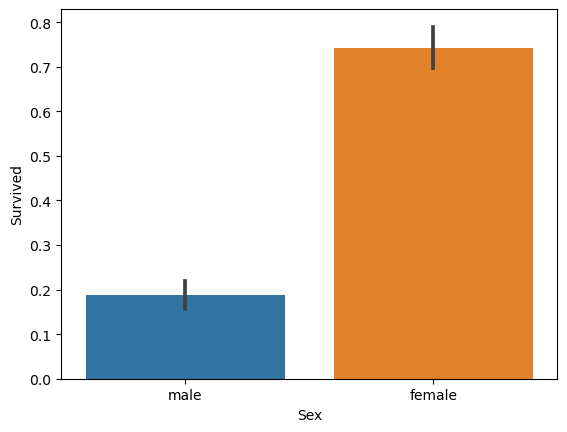

In [43]:
sns.barplot(x='Sex', y='Survived', data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

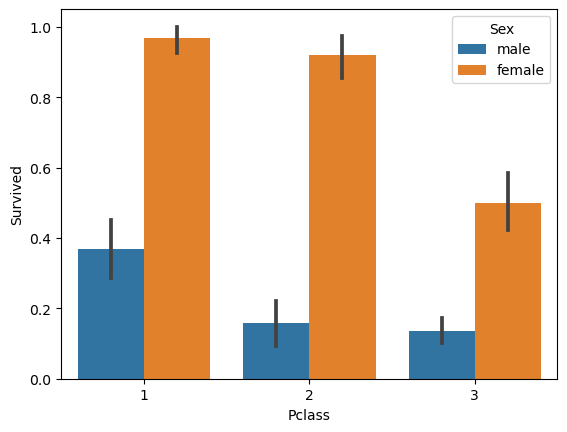

In [44]:
# 2. 부자와 가난한 사람의 생존 확률
# 객실 등급별 성별에 따른 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

# 여성의 경우 일/이등실과 달리 삼등실의 생존 확률이 많이 떨어짐
# 남성의 경우 일등실의 생존 확률이 이/삼등실보다 높음

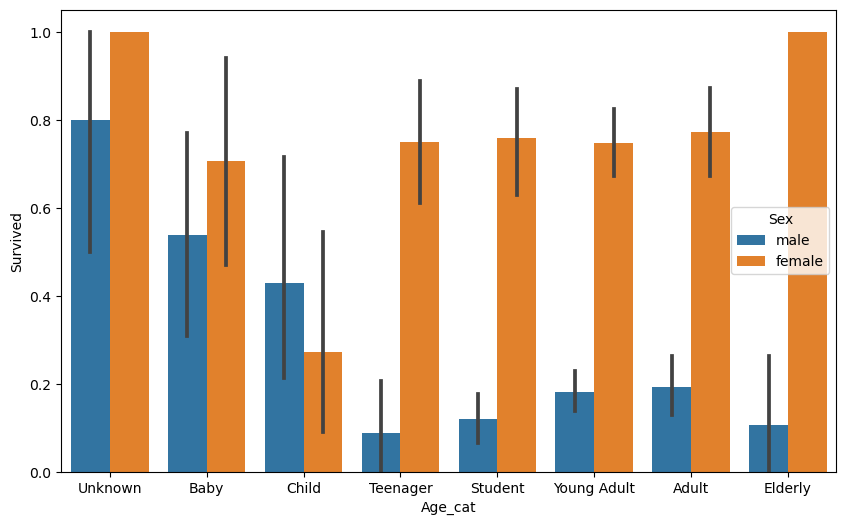

In [45]:
# Age에 따른 생존 확률
# 입력 age에 따라 구분 값을 반환하는 함수 설정, df의 apply lambda 식에 사용
def get_category(age) :
    cat = ''
    if age <= 1 : cat='Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat
# 막대그래프의 figure를 더 크게 설정
plt.figure(figsize = (10,6))
# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 
               'Young Adult', 'Adult', 'Elderly']
# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 Age 칼럼 값을 받아 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', 
            data=titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

# 여자아기의 경우 비교적 생존 확률이 높지만 여자 child는 타 연령에 비해 낮음. 여자 elderly는 매우 높음

In [46]:
# 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
from sklearn import preprocessing
def encode_features(dataDF) :
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [47]:
# Null 처리 함수
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df) :
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df) :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [48]:
# 원본 데이터를 재로딩하고 피처 데이터 세트와 레이블 데이터 추출
titanic_df = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived'] # 클래스 결정값 데이터 세트
X_titanic_df = titanic_df.drop('Survived', axis=1) # 생존 속성을 드롭한 피처 데이터 세트

X_titanic_df = transform_features(X_titanic_df)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,
                                                    y_titanic_df,
                                                    test_size = 0.2,
                                                    random_state = 11)
# 테스트 데이터는 전체 데이터의 20 % 

In [50]:
# ML 알고리즘(결정 트리, 랜덤 포레스트, 로지스틱 회귀)를 이용해 타이타닉 생존자 예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, RF, 로지스틱 회귀(분류 모델)을 위한 사이킷런 classifier 모댈 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# decisionTreeclassifier 학습, 예측, 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# randomforestclassifier 학습, 예측, 평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# logisticRegression 학습, 예측, 평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도:0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8492


C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# 교차 검증 수행으로 결정 트리 모델 평가
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5) :
    # 폴드 세트를 5개인 kfold객체를 생성, 폴드 수만큼 예측결과 저장 위한 리스트 객체
    kfold = KFold(n_splits = folds)
    scores = []
    # kfold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)) :
        # x_titanic_df 데이터에서 교차검증별로 학습.검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
        # 5개 fold에서의 평균 정확
        mean_score = np.mean(scores)
        print('평균 정확도: {0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)


교차 검증 0 정확도 : 0.7542
평균 정확도: 0.7542
교차 검증 1 정확도 : 0.7809
평균 정확도: 0.7675
교차 검증 2 정확도 : 0.7865
평균 정확도: 0.7739
교차 검증 3 정확도 : 0.7697
평균 정확도: 0.7728
교차 검증 4 정확도 : 0.8202
평균 정확도: 0.7823


In [52]:
# cross_val_score로 교차 검증 수행
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores) :
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


kfold와 cross_val_score의 평균 정확도가 다른 이유 : cross_val_score는 stratifiedKFold를 사용해 분할하기 때문임.

In [54]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5], 
              'min_samples_leaf' : [1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# gridsearchcv의 최적 하이퍼 파라미터로 학습된 estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 dtclf 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 dtclf 정확도: 0.8715


In [ ]:
: 